In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read the Spend Excel Sheet 

In [2]:
df = pd.read_excel('Spend.xlsx')

In [3]:
df.head()

,Sl No:,Customer,Month,Type,Spend Amount
0,1,A1,2004-01-12,JEWELLERY,473775.834869
1,2,A1,2004-01-03,PETRO,335578.666019
2,3,A1,2004-01-15,CLOTHES,371040.941912
3,4,A1,2004-01-25,FOOD,141177.813256
4,5,A1,2005-01-17,CAMERA,398403.771812


In [4]:
df.tail()

,Sl No:,Customer,Month,Type,Spend Amount
1495,1496,A67,2006-02-04,BUS TICKET,195841.312215
1496,1497,A68,2006-03-25,BUS TICKET,284262.517709
1497,1498,A69,2006-03-31,BUS TICKET,206552.273598
1498,1499,A70,2006-03-23,BUS TICKET,41024.781283
1499,1500,A71,2006-03-24,BUS TICKET,101397.548588


In [5]:
df.shape

(1500, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Sl No:        1500 non-null   int64         
 1   Customer      1500 non-null   object        
 2   Month         1500 non-null   datetime64[ns]
 3   Type          1500 non-null   object        
 4   Spend Amount  1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [7]:
df.columns

Index(['Sl No:', 'Customer', 'Month', 'Type', 'Spend Amount'], dtype='object')

# Q.1. Monthly spend of each customer.


In [8]:
df['Date'] = pd.to_datetime(df['Month'], format='%d-%b-%y')

monthly_spend = df.groupby(['Customer', pd.Grouper(key='Date', freq='M')])['Spend Amount'].sum().reset_index()

print(monthly_spend)

    Customer       Date  Spend Amount
0         A1 2004-01-31  1.511173e+06
1         A1 2004-02-29  4.138111e+04
2         A1 2004-05-31  1.311966e+05
3         A1 2005-01-31  3.984038e+05
4         A1 2005-02-28  1.404193e+06
..       ...        ...           ...
802      A95 2004-01-31  3.478339e+05
803      A96 2004-01-31  3.203635e+05
804      A97 2004-01-31  1.643300e+05
805      A98 2004-01-31  8.748351e+04
806      A99 2004-01-31  4.760204e+05

[807 rows x 3 columns]


# Read the Repayment Sheet

In [9]:
df1 = pd.read_excel("Repayment.xlsx")

In [10]:
df1.head()

,SL No:,Customer,Months,Amount
0,1,A1,2004-01-12,331844.007374
1,2,A1,2004-01-03,441139.807335
2,3,A1,2004-01-15,32480.004009
3,4,A1,2004-01-25,90636.966534
4,5,A1,2005-01-17,1581.969829


## Q.2. Monthly repayment of each customer

In [13]:
df1['Date'] = pd.to_datetime(df1['Months'], format='%d-%b-%y')

monthly_repayment = df1.groupby(['Customer', pd.Grouper(key='Date', freq='M')])['Amount'].sum().reset_index()

print(monthly_repayment)

    Customer       Date        Amount
0         A1 2004-01-31  1.362775e+06
1         A1 2004-02-29  1.911800e+05
2         A1 2005-01-31  1.581970e+03
3         A1 2005-02-28  1.199808e+06
4         A1 2005-07-31  3.005817e+05
..       ...        ...           ...
793      A95 2004-01-31  7.510949e+04
794      A96 2004-01-31  1.101390e+05
795      A97 2004-01-31  1.746064e+05
796      A98 2004-01-31  9.780260e+04
797      A99 2004-01-31  3.585899e+05

[798 rows x 3 columns]


## Extract the table Customer Acqusition

In [14]:
df2 = pd.read_csv("Customer Acqusition.csv")


In [15]:
df2.head()

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment,Spend Amount,Repayment Amount,Total different Months in 3 years,Total Limit in 3 Years,Penalty within 3 Years,Credit Bonus within 3 Years
0,1,A1,51.4378,BANGALORE,Gold,"INR 500,000",C1,Self Employed,4858294,3831938,7,"INR 3,500,000",70000.0,0.0
1,10,A10,35.5346,CALCUTTA,Gold,"INR 500,000",C10,Normal Salary,4110786,5230312,8,"INR 4,000,000",80000.0,80000.0
2,100,A100,51.4378,COCHIN,Silver,"INR 100,000",C5,Salaried_MNC,42254,151141,1,"INR 100,000",0.0,2000.0
3,11,A11,45.8203,COCHIN,Gold,"INR 500,000",C11,Normal Salary,4581924,4735300,9,"INR 4,500,000",90000.0,90000.0
4,12,A12,69.6639,BOMBAY,Gold,"INR 500,000",C12,Self Employed,6848587,7572754,11,"INR 5,500,000",110000.0,110000.0


In [16]:
df2.tail()

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment,Spend Amount,Repayment Amount,Total different Months in 3 years,Total Limit in 3 Years,Penalty within 3 Years,Credit Bonus within 3 Years
95,95,A95,29.6316,PATNA,Gold,"INR 500,000",C18,Salaried_MNC,347834,75109,1,"INR 500,000",0.00,0.00
96,96,A96,20.6118,CHENNAI,Silver,"INR 100,000",C19,Salaried_Pvt,320364,110139,1,"INR 100,000",2000.00,0.00
97,97,A97,40.5390,TRIVANDRUM,Platimum,"INR 10,000",C20,Govt,164330,174606,1,"INR 10,000",200.00,200.00
98,98,A98,21.5887,CALCUTTA,Platimum,"INR 10,001",C21,Normal Salary,87484,97803,1,"INR 10,001",200.02,200.02
99,99,A99,23.6076,CALCUTTA,Platimum,"INR 10,002",C22,Self Employed,476020,358590,1,"INR 10,002",200.04,0.00


# Q.4.People in which segment are spending more money

In [17]:
df2.drop(['Sl No:'],axis=1)

,Customer,Age,City,Credit Card Product,Limit,Company,Segment,Spend Amount,Repayment Amount,Total different Months in 3 years,Total Limit in 3 Years,Penalty within 3 Years,Credit Bonus within 3 Years
0,A1,51.4378,BANGALORE,Gold,"INR 500,000",C1,Self Employed,4858294,3831938,7,"INR 3,500,000",70000.00,0.00
1,A10,35.5346,CALCUTTA,Gold,"INR 500,000",C10,Normal Salary,4110786,5230312,8,"INR 4,000,000",80000.00,80000.00
2,A100,51.4378,COCHIN,Silver,"INR 100,000",C5,Salaried_MNC,42254,151141,1,"INR 100,000",0.00,2000.00
3,A11,45.8203,COCHIN,Gold,"INR 500,000",C11,Normal Salary,4581924,4735300,9,"INR 4,500,000",90000.00,90000.00
4,A12,69.6639,BOMBAY,Gold,"INR 500,000",C12,Self Employed,6848587,7572754,11,"INR 5,500,000",110000.00,110000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A95,29.6316,PATNA,Gold,"INR 500,000",C18,Salaried_MNC,347834,75109,1,"INR 500,000",0.00,0.00
96,A96,20.6118,CHENNAI,Silver,"INR 100,000",C19,Salaried_Pvt,320364,110139,1,"INR 100,000",2000.00,0.00
97,A97,40.5390,TRIVANDRUM,Platimum,"INR 10,000",C20,Govt,164330,174606,1,"INR 10,000",200.00,200.00
98,A98,21.5887,CALCUTTA,Platimum,"INR 10,001",C21,Normal Salary,87484,97803,1,"INR 10,001",200.02,200.02


In [18]:
dg= df2.groupby('Segment').sum("Spend Amount")
dg

,Sl No:,Age,Spend Amount,Repayment Amount,Total different Months in 3 years,Penalty within 3 Years,Credit Bonus within 3 Years
Segment,,,,,,,
Govt,1884,1408.0336,67325632,65171406,111,479201.64,132400.38
Normal Salary,953,1103.4765,107707145,107108893,177,829203.56,555201.36
Salaried_MNC,515,684.4162,63639489,62597404,91,445601.04,145600.72
Salaried_Pvt,487,637.3112,71704313,65779451,99,565200.64,81800.00
Self Employed,1211,1143.2037,70975476,70551288,100,571400.48,300800.14


In [21]:
dg[dg['Spend Amount']==dg['Spend Amount'].max()]

,Sl No:,Age,Spend Amount,Repayment Amount,Total different Months in 3 years,Penalty within 3 Years,Credit Bonus within 3 Years
Segment,,,,,,,
Normal Salary,953,1103.4765,107707145,107108893,177,829203.56,555201.36


# Q.5. Which is the most profitable segment?

In [22]:
ds=dg.loc[:, ['Penalty within 3 Years', 'Credit Bonus within 3 Years']]
ds

,Penalty within 3 Years,Credit Bonus within 3 Years
Segment,,
Govt,479201.64,132400.38
Normal Salary,829203.56,555201.36
Salaried_MNC,445601.04,145600.72
Salaried_Pvt,565200.64,81800.00
Self Employed,571400.48,300800.14


In [23]:
sf = pd.DataFrame({'Segment': ["Govt","Normal Salary","Salaried_MNC","Salaried_Pvt","Self Employed"],
                   'Penalty within 3 Years' :[479201.64, 829203.56, 445601.04, 565200.64, 571400.48] ,
                   'Credit Bonus within 3 Years':[132400.38, 555201.36, 145600.72, 81800.00, 300800.14],
                  })
  
# Printing the dataframe
sf['index'] = sf.index
sf

,Segment,Penalty within 3 Years,Credit Bonus within 3 Years,index
0,Govt,479201.64,132400.38,0
1,Normal Salary,829203.56,555201.36,1
2,Salaried_MNC,445601.04,145600.72,2
3,Salaried_Pvt,565200.64,81800.00,3
4,Self Employed,571400.48,300800.14,4


In [24]:
# Find rows where 'Credit Bonus within 3 Years' is maximum
max_credit_bonus = sf[sf['Credit Bonus within 3 Years'] == sf['Credit Bonus within 3 Years'].max()]

# Find rows where 'Penalty within 3 Years' is minimum
min_penalty = sf[sf['Penalty within 3 Years'] == sf['Penalty within 3 Years'].min()]

# Merge the two conditions using the 'Name' column
result = pd.merge(max_credit_bonus, min_penalty, on='Segment')

print("Result:\n", result)

Result:
 Empty DataFrame
Columns: [Segment, Penalty within 3 Years_x, Credit Bonus within 3 Years_x, index_x, Penalty within 3 Years_y, Credit Bonus within 3 Years_y, index_y]
Index: []


In [28]:
max_credit_bonus=df1[df1['Credit Bonus within 3 Years']==df1['Credit Bonus within 3 Years'].max()] 

min_penalty=df1[df1['Penalty within 3 Years']==df1['Penalty within 3 Years'].min()]

# Merge the two conditions using the 'Segment' column
result = pd.merge(max_credit_bonus, min_penalty, on = "Segment")

print("Result:\n", result)

Result:
    Sl No:_x Customer_x    Age_x  City_x Credit Card Product_x      Limit_x  \
0        12        A12  69.6639  BOMBAY                  Gold  INR 500,000   
1        12        A12  69.6639  BOMBAY                  Gold  INR 500,000   
2        12        A12  69.6639  BOMBAY                  Gold  INR 500,000   
3        12        A12  69.6639  BOMBAY                  Gold  INR 500,000   

  Company_x        Segment  Spend Amount_x  Repayment Amount_x  ...  \
0       C12  Self Employed         6848587             7572754  ...   
1       C12  Self Employed         6848587             7572754  ...   
2       C12  Self Employed         6848587             7572754  ...   
3       C12  Self Employed         6848587             7572754  ...   

      City_y Credit Card Product_y      Limit_y  Company_y  Spend Amount_y  \
0     COCHIN                  Gold  INR 500,000        C14         3680119   
1  BANGALORE                Silver  INR 500,000        C38           65278   
2  BANGALO

# Q.5. Which age group is spending more money?

<Axes: xlabel='Age', ylabel='Spend Amount'>

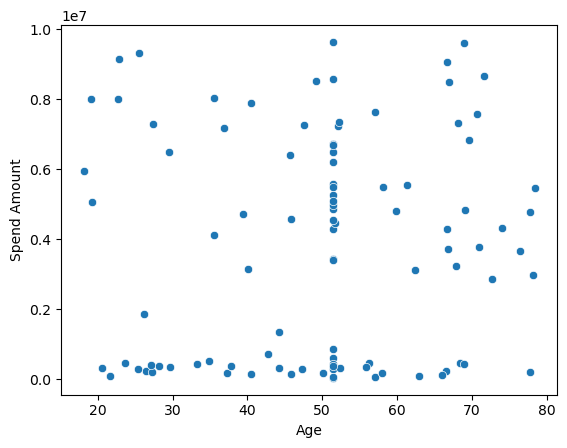

In [20]:
sns.scatterplot(x='Age', y='Spend Amount', data= df2)

# Average age of the maximum spender

In [30]:
# Find the individual who spent the maximum amount
max_spender = df1.loc[df1['Spend Amount'].idxmax()]

# Get the average age of the maximum spender
average_age = df1[df1['Spend Amount'] == max_spender['Spend Amount']]['Age'].mean()

print("Average age of the maximum spender:", average_age)

Average age of the maximum spender: 51.4378


In [31]:
df2 = pd.read_excel("Repayment.xlsx")

In [32]:
df2.head()

,SL No:,Customer,Months,Amount
0,1,A1,2004-01-12,331844.007374
1,2,A1,2004-01-03,441139.807335
2,3,A1,2004-01-15,32480.004009
3,4,A1,2004-01-25,90636.966534
4,5,A1,2005-01-17,1581.969829


# Q.3. Highest paying 10 customers

In [19]:
# Sort the DataFrame by Amount in descending order
df1_sorted = df1.sort_values("Amount", ascending=False)

top_10_customers = df1_sorted.head(10)

print(top_10_customers)

      SL No: Customer     Months         Amount       Date
714      715      A37 2006-03-25  499344.940170 2006-03-25
1448    1449      A61 2006-04-01  499136.771967 2006-04-01
435      436      A26 2005-02-03  498972.674978 2005-02-03
80        81      A79 2006-03-31  497836.717301 2006-03-31
728      729      A22 2006-05-08  497163.529407 2006-05-08
107      108       A6 2004-01-03  497144.977565 2004-01-03
581      582      A20 2004-01-12  496732.730151 2004-01-12
1132    1133      A62 2005-02-01  496662.767546 2005-02-01
722      723      A45 2006-04-19  496519.660471 2006-04-19
511      512      A26 2004-11-23  496338.309643 2004-11-23


In [34]:
import datetime

In [35]:
print(df2)

      SL No: Customer     Months         Amount
0          1       A1 2004-01-12  331844.007374
1          2       A1 2004-01-03  441139.807335
2          3       A1 2004-01-15   32480.004009
3          4       A1 2004-01-25   90636.966534
4          5       A1 2005-01-17    1581.969829
...      ...      ...        ...            ...
1495    1496      A67 2005-05-09  200288.874065
1496    1497      A68 2006-05-10  231194.702295
1497    1498      A69 2006-07-11  391195.615836
1498    1499      A70 2005-08-12  357629.618186
1499    1500      A71 2004-09-13  179771.745248

[1500 rows x 4 columns]


# Q.9.Impose an interest rate of 2.9% for each customer for any due amount.

In [37]:
df1['Due Amount'] = np.maximum(df1['Spend Amount'] - df1['Repayment Amount'],0)

In [38]:
df1['Due Amount']

0     1026356
1           0
2           0
3           0
4           0
       ...   
95     272725
96     210225
97          0
98          0
99     117430
Name: Due Amount, Length: 100, dtype: int64

In [39]:
interest_rate = 0.029  # 2.9% interest rate

df1['Interest Amount'] = df1['Due Amount'] * interest_rate

In [40]:
df1['Due Amount with Interest'] = df1['Due Amount'] + df1['Interest Amount']

In [41]:
df1['Due Amount with Interest']

0     1056120.324
1           0.000
2           0.000
3           0.000
4           0.000
         ...     
95     280634.025
96     216321.525
97          0.000
98          0.000
99     120835.470
Name: Due Amount with Interest, Length: 100, dtype: float64

# Q.7. In which category the customers are spending more money?

In [26]:
np.unique(df['Type'])

array(['AIR TICKET', 'AUTO', 'BIKE', 'BUS TICKET', 'CAMERA', 'CAR',
       'CLOTHES', 'FOOD', 'JEWELLERY', 'MOVIE TICKET', 'PETRO', 'RENTAL',
       'SANDALS', 'SHOPPING', 'TRAIN TICKET'], dtype=object)

In [27]:
df.drop(['Sl No:'],axis=1)
dg1= df.groupby('Type').sum("Spend Amount")
dg1.drop(['Sl No:'],axis=1)

,Spend Amount
Type,
AIR TICKET,3.743547e+07
AUTO,1.050509e+07
BIKE,1.315264e+07
BUS TICKET,2.490590e+07
CAMERA,4.372101e+07
CAR,7.018278e+06
CLOTHES,2.479110e+07
FOOD,3.829646e+07
JEWELLERY,2.524795e+07


In [28]:
sf = pd.DataFrame({'Travelling': ['AUTO', 'BIKE', 'CAR', 'PETRO'],
                   'Spend Amount': [10505087, 13152636, 7018278, 51022583],
                   'Accessories': ['CAMERA', 'CLOTHES', 'JEWELLERY', 'SANDALS'],
                   'Spend Amount.1': [43721013, 24791100, 25247952, 6325017],
                   'GROCERY': ['FOOD', 'SHOPPING', 'RENTAL', pd.NA],
                   'Spend Amount.2': [38296463, 20914671, 27418683, 0],
                   'ONLINE TICKET BOOKING': ['AIR TICKET', 'BUS TICKET', 'MOVIE TICKET', 'TRAIN TICKET'],
                   'Spend Amount.3': [37435466, 24905897, 18784581, 31812624]})
sf

,Travelling,Spend Amount,Accessories,Spend Amount.1,GROCERY,Spend Amount.2,ONLINE TICKET BOOKING,Spend Amount.3
0,AUTO,10505087,CAMERA,43721013,FOOD,38296463,AIR TICKET,37435466
1,BIKE,13152636,CLOTHES,24791100,SHOPPING,20914671,BUS TICKET,24905897
2,CAR,7018278,JEWELLERY,25247952,RENTAL,27418683,MOVIE TICKET,18784581
3,PETRO,51022583,SANDALS,6325017,<NA>,0,TRAIN TICKET,31812624


In [29]:
column_sums = sf.sum()
column_sums

Travelling                                           AUTOBIKECARPETRO
Spend Amount                                                 81698584
Accessories                             CAMERACLOTHESJEWELLERYSANDALS
Spend Amount.1                                              100085082
Spend Amount.2                                               86629817
ONLINE TICKET BOOKING    AIR TICKETBUS TICKETMOVIE TICKETTRAIN TICKET
Spend Amount.3                                              112938568
dtype: object

In [30]:
column_totals = sf.iloc[:, 1::2].sum()
max_spending_column = column_totals.idxmax()
max_spending_column

'Spend Amount.3'

### therefore in "ONLINE TICKET BOOKING" category the customers are spending more money.

# Q.8. Monthly profit for Bank 

In [38]:
df['Date'] = pd.to_datetime(df['Month'], format='%d-%b-%y')

monthly_spend = df.groupby(['Customer', pd.Grouper(key='Date', freq='M')])['Spend Amount'].sum().reset_index()

df1['Date'] = pd.to_datetime(df1['Months'], format='%d-%b-%y')

monthly_repayment = df1.groupby(['Customer', pd.Grouper(key='Date', freq='M')])['Amount'].sum().reset_index()

monthly_profit_for_bank = np.maximum(monthly_repayment['Amount'] - monthly_spend['Spend Amount'] , 0)

print(monthly_profit_for_bank)

interest_rate = 0.029  # 2.9% interest rate

Interest_Amount = monthly_profit_for_bank * interest_rate

0           0.000000
1      149798.905749
2           0.000000
3      801403.852738
4           0.000000
           ...      
802              NaN
803              NaN
804              NaN
805              NaN
806              NaN
Length: 807, dtype: float64
